In [158]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy

In [159]:


spacing = 0.005     # spacing of cells on the lattice [mm]
delta = spacing 
N = 512             # number of neurons in each layer [1]
L =  N * delta      #300 * 0.005
speed =  0.8        # speed [mm/s]
dt = 0.001          # integration time step [s]
T = int(L/speed/dt)

In [160]:

def compute_spatiotemporal_frequencies(signal, dt, delta):

    # in case of uneven axes, shift before transform
    ft_signal = np.fft.ifftshift(signal)


    # # Perform a 2D Fourier Transform on the signal
    ft_signal = np.fft.fft2(ft_signal)

    # # Shift the zero frequency component to the center
    ft_signal= np.fft.fftshift(ft_signal)


    return  ft_signal



def extract_frequencies(spect): 
    N,T = spect.shape
    max_idx = spect.argmax()

    spacemax = max_idx // T
    timemax = max_idx % T

    Nmax = N/2 - spacemax
    Tmax = T/2 - timemax

    return Nmax,Tmax #mm/s


0.0 7.0
4.0 0.0
4.0 0.0


Text(0.5, 1.0, '$\\omega$ = 0.0, $k$ = 4.0')

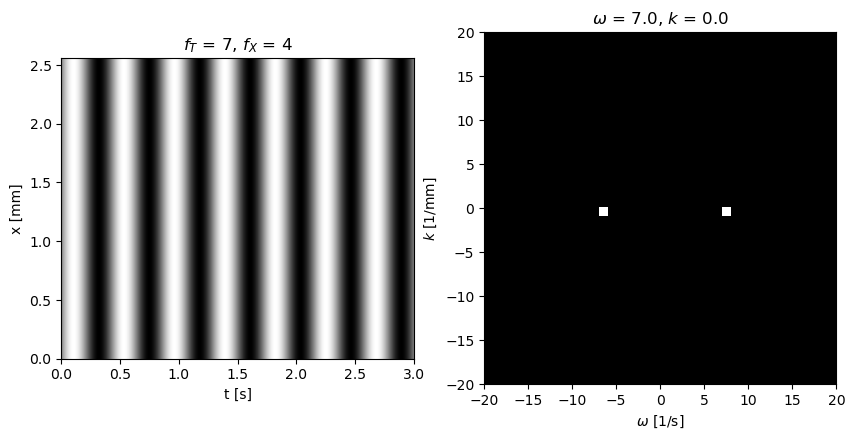

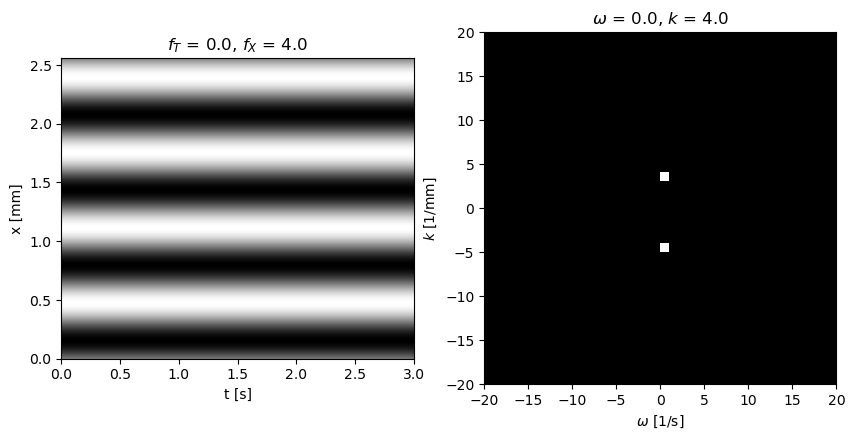

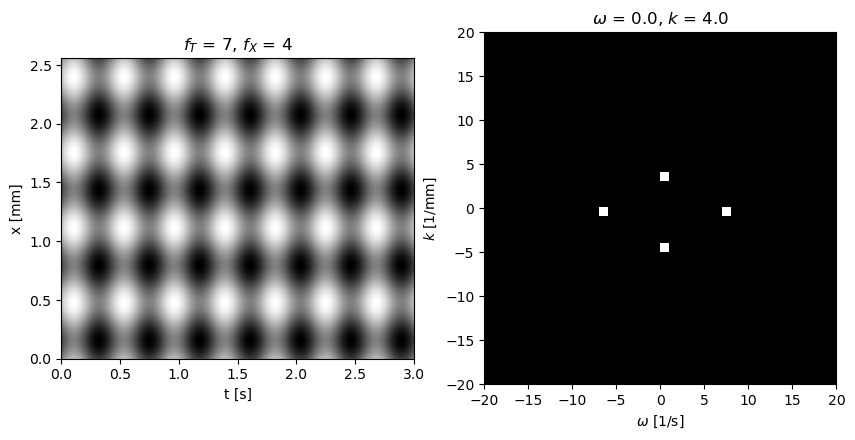

In [161]:
T = 3000
N = 512



x, y = np.meshgrid(np.arange(T), np.arange(N))


fig = plt.figure(figsize = (10,20))
gs  = fig.add_gridspec(1,2)

ft = 7
fx = 4

grat_ft = np.sin((2*np.pi/T) * ft * x)
fts_ft = compute_spatiotemporal_frequencies(grat_ft,dt,delta)

Nmax,Tmax = extract_frequencies(np.abs(fts_ft))
print(Nmax,Tmax)

ax = fig.add_subplot(gs[0,0])
plt.imshow(grat_ft, extent=(0, T*dt, 0,N*spacing))
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.title(f'$f_T$ = {ft}, $f_X$ = {fx}')


ax = fig.add_subplot(gs[0,1])
plt.imshow(np.abs(fts_ft),extent=(-T/2, T/2,-N/2,N/2))
plt.xlim(-20,+20)
plt.ylim(-20, +20)
np.argmax(np.abs(fts_ft)) % T

plt.xlabel(r'$\omega$ [1/s]')
plt.ylabel(r'$k$ [1/mm]')
plt.title(f'$\omega$ = {Tmax}, $k$ = {Nmax}')




fig = plt.figure(figsize = (10,20))
gs  = fig.add_gridspec(1,2)

ft = 7
fx = 4

grat_fx = np.sin((2*np.pi/N) * fx * y)
fts_fx = compute_spatiotemporal_frequencies(grat_fx,dt,delta)

Nmax,Tmax = extract_frequencies(np.abs(fts_fx))
print(Nmax,Tmax)

ax = fig.add_subplot(gs[0,0])
plt.imshow(grat_fx, extent=(0, T*dt, 0,N*spacing))
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.title(f'$f_T$ = {Tmax}, $f_X$ = {Nmax}')


ax = fig.add_subplot(gs[0,1])
plt.imshow(np.abs(fts_fx),extent=(-T/2, T/2,-N/2,N/2))
plt.xlim(-20,+20)
plt.ylim(-20, +20)

plt.xlabel(r'$\omega$ [1/s]')
plt.ylabel(r'$k$ [1/mm]')
plt.title(f'$\omega$ = {Tmax}, $k$ = {Nmax}')



fig = plt.figure(figsize = (10,20))
gs  = fig.add_gridspec(1,2)

ft = 7
fx = 4

grat_ft_fx = np.sin((2*np.pi/N) * fx * y) + np.sin((2*np.pi/T) * ft * x)
fts_ft_fx = compute_spatiotemporal_frequencies(grat_ft_fx,dt,delta)

Nmax,Tmax = extract_frequencies(np.abs(fts_ft_fx))
print(Nmax,Tmax)

ax = fig.add_subplot(gs[0,0])
plt.imshow(grat_ft_fx, extent=(0, T*dt, 0, N*spacing))
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.title(f'$f_T$ = {ft}, $f_X$ = {fx}')


ax = fig.add_subplot(gs[0,1])
plt.imshow(np.abs(fts_ft_fx),extent=(-T/2, T/2, -N/2, N/2))
plt.xlim(-20,+20)
plt.ylim(-20, +20)

plt.xlabel(r'$\omega$ [1/s]')
plt.ylabel(r'$k$ [1/mm]')
plt.title(f'$\omega$ = {Tmax}, $k$ = {Nmax}')



In [162]:
fts_ft.shape

(512, 3000)